We have chosen Telecom customer churn prediction dataset to develop a machine learning model that can predict customers who can churn telecom service subscription in the future based on multiple factors.

* We have performed below steps to evaluate data and select features.

**1. Missing Value Check :**

*	We are using isnull() function to check missing values in dataset.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
churn_data = pd.read_csv('/content/Telecom_customer_churn_prediction.csv')
churn_data.isnull().sum()
churn_data.shape

(7043, 21)

* **Result**: As we can see all columns are having not null values which means there are no missing values for any feature in the dataset. We are good to move ahead for data exploration and feature selection.

---

**2.	Data Analysis and Exploration –**

* In this step we can understand the features and feature column values available in the dataset. 
* Here we have used few functions to understand dataset in depth .

In [ ]:
pd.set_option('display.max_columns', None) 
print(churn_data.head())
print(churn_data.shape)
print(churn_data.info())
print(churn_data.describe())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No        

* In dataset we have total 21 features and categories as below.

* **Categorical features -** 
1.	customerID – Unique customer Id
2.	gender - Female, Male 
3.	SeniorCitizen - if customer is senior citizen, possible values 0, 1
4.	Partner – if subscriber has partner, possible values Yes, No
5.	Dependents - if subscriber has dependents values Yes, No  
6.	tenure -the customer has stayed for Number of months with company  
7.	PhoneService - if customer has phone service, possible values Yes, No
8.	MultipleLines - if customer has multiple lines, possible values Yes, No, No 
phone service   
9.	InternetService - Internet service provider, possible values DSL, No, Fiber optic  
10.	OnlineSecurity - if customer provided with online security, possible values 
Yes, No, No internet service   
11.	 OnlineBackup - if customer provided with any backup support, possible 
values Yes, No, No internet service
12.	DeviceProtection - if customer provided with any device protection service,
possible values Yes, No, No internet service 
13.	TechSupport - if customer has technical support, possible values Yes, No, No internet service       
14.	 StreamingTV- if customer using streaming TV, possible values Yes, No, No internet service     
15.	 StreamingMovies - if customer is straming movies, possible values Yes, No, No internet service   
16.	Contract - customer contract period, possible values Month-to-month, One year, Two year          
17.	PaperlessBilling- if customer using paper bill service, possible values Yes, No
18.	PaymentMethod – There are 4 types of payment method, Electronic, mailed, Bank transfer, Credit card
19.	MonthlyCharges - Monthly charge
20.	TotalCharges - Total Charge
21.	 Churn - customer churned status, possible values Yes, No
 
* Except "tenure","TotalCharges" and "MonthlyCharges" datatype of all other features are Object.
* We have total 7043 records in which 1869 records of churned customers and 5174 records of not churned customers.
* "tenure","TotalCharges" and "MonthlyCharges" are continuous variable whereas remaining features are categorical.

**3. HeatMap and Feature Selection :** 

* In this step we will find feature correlation and select features.
* We have observed below feature dependency in dataset.
1.	Churn rate is high for high monthly charges.
2.	Churn rate is high for less customer tenure. 
3.	Customers subscribe with online security tend to have less churn rate.
4.	 Customers subscribe without tech support tend to have high churn rate.
5.	Customers subscribe with fiber optic internet services tend to have high churn rate.
6.	For gender, churn rate is nearly close for male and female.
7.	Customers subscribe with phone services tend to have high churn rate.

* Based on all above observation Churn is dependent on all other selected features we have defined below dependent and independent variables.
* Dependent Variables - gender, tenure, PhoneService, MultipleLines, phoneservice, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, 
PaymentMethod, MonthlyCharges, TotalCharges
      
* Independent Variable – Churn

* We have dropped columns – customerID, SeniorCitizen, partner, Dependents, PaymentMethod as these columns were not affecting churn predictions.

In [ ]:
def converter(column):
    if column == 'Yes':
        return 1
    else:
        return 0

In [ ]:
churn_data['gender'] = churn_data['gender'].map({'Female':1, 'Male':0})
churn_data['MultipleLines'] = churn_data['MultipleLines'].map({'Yes':1, 'No':0,'No phone service':0})
churn_data['InternetService'] = churn_data['InternetService'].map({'DSL':1, 'Fiber optic':0,'No':0})
churn_data['OnlineSecurity'] = churn_data['OnlineSecurity'].map({'Yes':1, 'No':0,'No internet service':0})
churn_data['OnlineBackup'] = churn_data['OnlineBackup'].map({'Yes':1, 'No':0,'No internet service':0})
churn_data['DeviceProtection'] = churn_data['DeviceProtection'].map({'Yes':1, 'No':0,'No internet service':0})
churn_data['TechSupport'] = churn_data['TechSupport'].map({'Yes':1, 'No':0,'No internet service':0})
churn_data['StreamingTV'] = churn_data['StreamingTV'].map({'Yes':1, 'No':0,'No internet service':0})
churn_data['StreamingMovies'] = churn_data['StreamingMovies'].map({'Yes':1, 'No':0,'No internet service':0})
churn_data['PhoneService'] = churn_data['PhoneService'].apply(converter)
churn_data['PaperlessBilling'] = churn_data['PaperlessBilling'].apply(converter)
churn_data['Churn'] = churn_data['Churn'].apply(converter)
print(churn_data.head(2))

   customerID  gender  SeniorCitizen Partner Dependents  tenure  PhoneService  \
0  7590-VHVEG       1              0     Yes         No       1             0   
1  5575-GNVDE       0              0      No         No      34             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              0                1               0             1   
1              0                1               1             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  \
0                 0            0            0                0   
1                 1            0            0                0   

         Contract  PaperlessBilling     PaymentMethod  MonthlyCharges  \
0  Month-to-month                 1  Electronic check           29.85   
1        One year                 0      Mailed check           56.95   

   TotalCharges  Churn  
0         29.85      0  
1       1889.50      0  


In [ ]:
categorical_features = ['Contract']
churn_final_data = pd.get_dummies(churn_data, columns = categorical_features)
print(churn_final_data.info())
print(churn_final_data.head(2))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customerID               7043 non-null   object 
 1   gender                   7043 non-null   int64  
 2   SeniorCitizen            7043 non-null   int64  
 3   Partner                  7043 non-null   object 
 4   Dependents               7043 non-null   object 
 5   tenure                   7043 non-null   int64  
 6   PhoneService             7043 non-null   int64  
 7   MultipleLines            7043 non-null   int64  
 8   InternetService          7043 non-null   int64  
 9   OnlineSecurity           7043 non-null   int64  
 10  OnlineBackup             7043 non-null   int64  
 11  DeviceProtection         7043 non-null   int64  
 12  TechSupport              7043 non-null   int64  
 13  StreamingTV              7043 non-null   int64  
 14  StreamingMovies         

In [ ]:
churn_final_data.drop(['customerID','SeniorCitizen','Partner','Dependents','PaymentMethod'],axis=1,inplace=True)

In [ ]:
print(churn_final_data.head(2))

   gender  tenure  PhoneService  MultipleLines  InternetService  \
0       1       1             0              0                1   
1       0      34             1              0                1   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
0               0             1                 0            0            0   
1               1             0                 1            0            0   

   StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  Churn  \
0                0                 1           29.85         29.85      0   
1                0                 0           56.95       1889.50      0   

   Contract_Month-to-month  Contract_One year  Contract_Two year  
0                        1                  0                  0  
1                        0                  1                  0  


In [ ]:
churn_corrs = churn_final_data.corr()

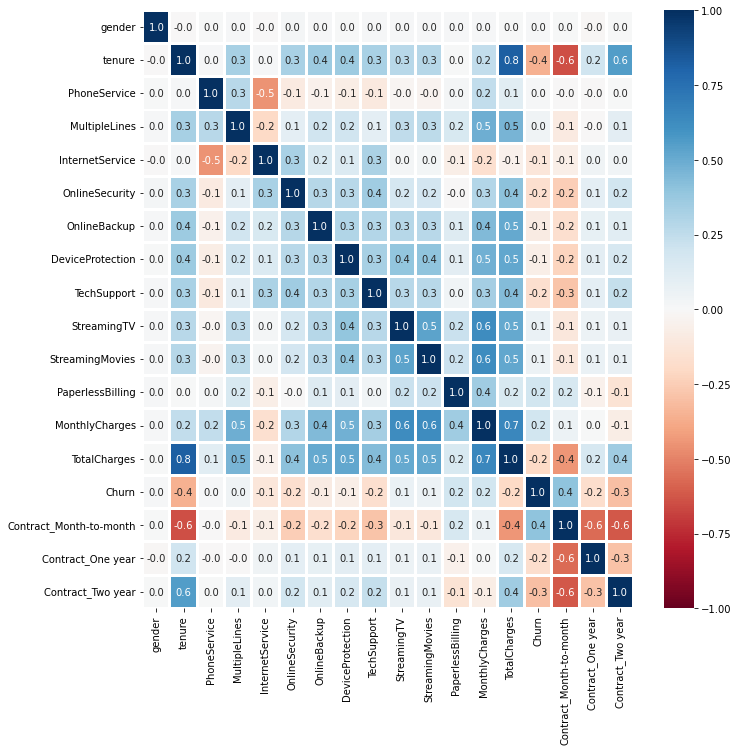

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(11,11))
sns.heatmap(churn_corrs,cmap='RdBu',center=0,vmin=-1,vmax=1,annot=True,fmt='.1f',linewidth=2)

---









* **5.Logistic Regression-**

* Data shows the binary classification in churn data hence its suitable to build regression model using logistic regression algorithm.
*	Next step is to divide dataset into label and feature.

In [ ]:
X = churn_final_data.drop('Churn', axis = 1) # Features
Y = churn_final_data['Churn'] # Labels
print(type(X))
print(type(Y))
print(X.shape)
print(Y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(7043, 17)
(7043,)


* Seperate churn dataset into training and test dataset.

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0) # Dataset is divided in 30% test data and 70% training data
model=LogisticRegression(max_iter=1000,random_state=0)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [ ]:
y_pred=model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.804868154158215
0.8007572172266919


**Evaluating Logistic Regression**

**Classifier evaluation:**

Split the Data: We are Splitting the dataset working with into two subgroups is a solid and regularly used strategy. The training set and the test set are the two sets. Normally, this divide is done at random. To fit our model, we used the training set. We evaluate the model's performance with the test set after it has been fitted. It's crucial to avoid using the test set when fitting the model. This method allows for a fair assessment of the model.

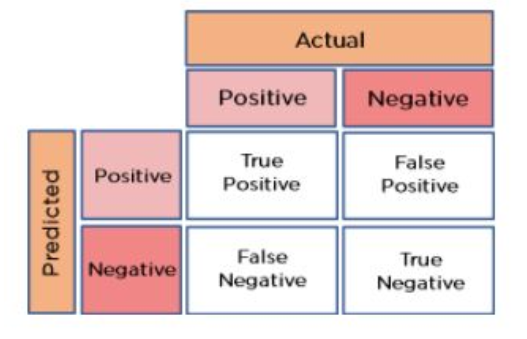

**1. Classification Accuracy -** This metric determines the percentage of right predictions among all forecasts. When we have unbalanced test sets, however, this measure is misleading.

**2. Precision —** This metric assesses the model's ability to prevent false positives.

**3. Recall -** This metric assesses the model's ability to prevent false negatives.

**4. F1 Score -** Measures the model's ability to prevent both false positives and false negatives.

In [ ]:
final_pred = [] 
for i in y_pred:
    if i > 0.5:
      final_pred.append(1)
    else:
        final_pred.append(0) 
yhat=final_pred  
df=pd.DataFrame({"Prediction":yhat,"Actual":y_test})
df

,Prediction,Actual
2200,0,0
4627,0,0
3225,0,0
2828,0,0
3768,0,0
...,...,...
4448,1,1
1231,0,0
3304,0,0
4805,0,0


**Accuracy of classification:**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score 
 ## Evaluate predictions
print(  confusion_matrix(y_test, yhat))
print('accuracy',accuracy_score(y_test, yhat))
#print(y_test.shape)

[[1392  168]
 [ 253  300]]
accuracy 0.8007572172266919


* As per above result 253 is false negative value and 168 false positive value. Since, we have high false negative value we have take recall score into consideration. 

**Precision and Recall:**

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred,average='binary')
print('Precision: %.3f' % precision)
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print('Recall: %.3f' % recall)
#X_train.shape

Precision: 0.641
Recall: 0.542


* Precision score = 0.641 and Recall score = 0.542

We have performed Logistic Regression with imbalanced Dataset.

In [ ]:
import imblearn
print(imblearn.__version__)

0.8.1


In [ ]:
# define oversampling strategy
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, Y)
print(Counter(Y))
#X_over.shape
print(Counter(y_over))
print(X.shape)
X_over.shape

Counter({0: 5174, 1: 1869})
Counter({0: 5174, 1: 5174})
(7043, 17)


(10348, 17)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_over,y_over,test_size=0.3,random_state=0) # testset is 30%

In [ ]:
model1=LogisticRegression(max_iter=10000, random_state=43)
model1.fit(X_train, y_train)
pred_lr=model1.predict(X_test)
pred_lr

array([1, 0, 1, ..., 1, 1, 0])

In [ ]:
pred_bin = [] 
for x in pred_lr:
    if x > 0.5:
      pred_bin.append(1)
    else:
        pred_bin.append(0) 

In [ ]:
print(accuracy_score(y_test, pred_bin))
print( confusion_matrix(y_test, pred_bin))

0.7636070853462158
[[1109  438]
 [ 296 1262]]


In [ ]:
precision = precision_score(y_test, pred_bin,average='binary')
print('Precision: %.3f' % precision)
recall = recall_score(y_test, pred_bin)
print('Recall: %.3f' % recall)

Precision: 0.742
Recall: 0.810


**Results**:
* After balancing the dataset our precision increased from 0.642 to 0.742 whereas recall increased from 0.542 to 0.810.

* It means our model is working better after balancing.

**F1 Score:**

In [ ]:
from sklearn.metrics import f1_score
f1score = f1_score(y_test, pred_bin,average='weighted')
print('f1_score: %.3f' % f1score)

f1_score: 0.763


**Accuracy with K-Fold Cross validation:**

The dataset is divided into k sections (k = 10). We call the activity of splitting the data a 'fold' every time we do so. The model is taught k-1 folds with one portion held back and then tested on that part. Each fold should be as close as feasible to the same record size. We end up with k various performance scores after running cross-validation, which we summarize using the mean and standard deviation.

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=100, shuffle=True)
model2= LogisticRegression(max_iter=10000,random_state=1)
results_kfold = cross_val_score(model2, X_over, y_over, cv=kfold)
print(results_kfold)
print('Accuracy with 10 fold cross validation: ',results_kfold.mean()*100.0)

[0.76618357 0.76618357 0.7826087  0.74009662 0.77391304 0.7410628
 0.73816425 0.76135266 0.76692456 0.7794971 ]
Accuracy with 10 fold cross validation:  76.15986880834245


In [ ]:
from sklearn.model_selection import cross_val_predict

y_pred1 = cross_val_predict(model2, X_over, y_over, cv=10)
conf_mat = confusion_matrix(y_over, y_pred1)
conf_mat

array([[3719, 1455],
       [ 990, 4184]])

Note: We have performed logistic regression with Balanced Dataset.

---

 **Stochastic Gradient Decent-**

* We know that stochastic gradient decent is used as an optimization of gradient decent. 
* As there are many disadvantages of gradient decent using in our model. 
* Gradient decent performs very bad when we have large number of data points and attributes. It increases the computation time to minimize the cost function. So, in these situations stochastic gradient decent is used. 
* The meaning of stochastic is random, so it randomly picks data points from the dataset i.e. sample of data points in each iteration to lower the computation time.
* We have used sklearn library of python to perform stochastic gradient decent in our dataset.
* We have used stochastic gradient decent classifier in our dataset as it is a classification problem. 
* We have taken loss parameter in stochastic gradient decent as log. It defines that we have used stochastic gradient decent with logistic regression. 
* We have taken max_iter = 1000 and penalty= l1, which is a regularisation parameter and alpha=0.005. Alpha is learning rate.
* We have found the best parameters of stochastic gradient decent by using GridSearchCV of sklearn library. 
* After this we have used confusion matrix of sklearn library to see false negative and false positive values in our model i.e., our model is not able to correctly predict these values. 
* After confusion matrix we have used classification report of sklearn library
* To see precision and recall of 0’s and 1’s in our model. So, by using confusion matrix we can find the accuracy of our model. As we have taken classification problem.

In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test,y_train,y_test = tts(X_over,y_over)

In [ ]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(loss="log", max_iter=10000,penalty='l1',random_state=43,alpha=0.0001).fit(X_train,y_train)

In [ ]:
y_pred = sgdc.predict(X_test)
y_pred

array([1, 1, 1, ..., 0, 0, 1])

In [ ]:
sgdc.score(X_train, y_train)

0.6935961860584976

In [ ]:
sgdc.score(X_test,y_test)

0.7000386548125241

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'max_iter':[1000,10000,20000],'penalty':['l1','l2','elasticnet'],'alpha':[0.0001,0.005,0.001]}
grid_search = GridSearchCV(sgdc,params,cv=5)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=SGDClassifier(loss='log', max_iter=10000, penalty='l1',
                                     random_state=43),
             param_grid={'alpha': [0.0001, 0.005, 0.001],
                         'max_iter': [1000, 10000, 20000],
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [ ]:
grid_search.best_params_

{'alpha': 0.001, 'max_iter': 1000, 'penalty': 'l1'}

In [ ]:
grid_search.best_score_

0.7124093872186191

In [ ]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(loss="log", max_iter=1000,penalty='l1',random_state=43,alpha=0.005).fit(X_train,y_train)

In [ ]:
y_pred = sgdc.predict(X_test)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
sgdc.score(X_train,y_train)

0.6959154748099472

In [ ]:
sgdc.score(X_test,y_test)

0.7046772323154232

In [ ]:
from sklearn import metrics as mt
print(mt.confusion_matrix(y_test,y_pred))

[[1143  167]
 [ 597  680]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.87      0.75      1310
           1       0.80      0.53      0.64      1277

    accuracy                           0.70      2587
   macro avg       0.73      0.70      0.69      2587
weighted avg       0.73      0.70      0.70      2587



In [ ]:
mt.precision_score(y_test,y_pred)

0.8028335301062574

In [ ]:
mt.recall_score(y_test,y_pred)

0.5324980422866092

In [ ]:
from sklearn.model_selection import cross_val_score
c_score = cross_val_score(sgdc,X,Y,cv=5)

In [ ]:
c_score

array([0.61745919, 0.77217885, 0.67210788, 0.71946023, 0.78835227])

In [ ]:
c_score.mean()

0.7139116838183108

**Again finding the *Accuracy* with K-fold:**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=10, random_state=100, shuffle=True)
model2= LogisticRegression(max_iter=10000,random_state=1)
results_kfold = cross_val_score(model2, X_over, y_over, cv=kfold)
print(results_kfold)
print('Accuracy with 10 fold cross validation: ',results_kfold.mean()*100.0)

[0.76618357 0.76618357 0.7826087  0.74009662 0.77391304 0.7410628
 0.73816425 0.76135266 0.76692456 0.7794971 ]
Accuracy with 10 fold cross validation:  76.15986880834245


* We have used 10 folds in cross validation and found 76.15% accuracy.

In [ ]:
from sklearn.model_selection import cross_val_predict

y_pred1 = cross_val_predict(model2, X_over, y_over, cv=10)
conf_mat = confusion_matrix(y_over, y_pred1)
conf_mat

array([[3719, 1455],
       [ 990, 4184]])

---

**Model Comparision: **

* In our dataset Logistic Regression is working better than Stochastic Gradient Descent Classifier.
*It is because our dataset is very small (contains only 7043 rows and 21 column) and sgd is used for very large dataset.

*   	Also, because logistic regression has inbulit gradient descent in it.
*   	Logistic Regression has precision score= 0.742 and recall score= 0.810 whereas Stochastic Gradient Descent has precision score= 0.8028 and 
recall score= 0.5324. So, clearly logistic regression wins the battle.

*   Additionally, stochastic gradient descent is purely an optimization technique whereas logistic regression is a Machine Learning algorithm. The role of SGD is to minimize the cost function.

*   SGD can be used with different machine learning algorithms like support vector machine whereas logistic regression can't be used.

https://colab.research.google.com/drive/163IANZmCK4YncAq7fV6HcnFzDtAaoeDP?usp=sharing